In [1]:
#Load packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv("drugs_side_effects_drugs_com.csv")
df.sample(5)

drug_name medical_condition  \
1808     perindopril      Hypertension   
166   Enzoclear Foam              Acne   
2694         Gengraf         Psoriasis   
264       Focalin XR              ADHD   
2847      perampanel          Seizures   

                                           side_effects  \
1808  hives ; severe stomach pain; difficulty breath...   
166                                                 NaN   
2694  Along with its needed effects, a medicine may ...   
264   fever; hives ; difficulty breathing; swelling ...   
2847  hives ; difficult breathing; swelling of your ...   

                   generic_name                              drug_classes  \
1808                perindopril  Angiotensin Converting Enzyme Inhibitors   
166            benzoyl peroxide                       Topical acne agents   
2694  cyclosporine (oral route)                    Calcineurin inhibitors   
264          dexmethylphenidate                            CNS stimulants   
2847                 perampanel                 AMPA receptor antagonists   

     brand_names activity rx_otc pregnancy_category csa alcohol  \
1808       Aceon       3%     Rx                  D   N     NaN   
166          NaN       0%     Rx                  C   N     NaN   
2694         NaN       1%     Rx                  C   N     NaN   
264      Focalin       8%     Rx                  C   2     NaN   
2847     Fycompa       1%     Rx                  C   3       X   

                                          related_drugs  \
1808  amlodipine: https://www.drugs.com/amlodipine.h...   
166   doxycycline: https://www.drugs.com/doxycycline...   
2694                                                NaN   
264                                                 NaN   
2847  gabapentin: https://www.drugs.com/gabapentin.h...   

                          medical_condition_description  rating  \
1808  High Blood Pressure (Hypertension) Other names...     4.8   
166   Acne Other names: Acne Vulgaris; Blackheads; B...     NaN   
2694  Psoriasis Other names: Erythrodermic Psoriasis...     NaN   
264   ADHD (Attention Deficit Hyperactivity Disorder...     7.0   
2847  Seizures (Convulsions) Other names: Absence Se...     4.7   

      no_of_reviews                                      drug_link  \
1808           40.0     https://www.drugs.com/mtm/perindopril.html   
166             NaN  https://www.drugs.com/pro/enzoclear-foam.html   
2694            NaN   https://www.drugs.com/cons/gengraf-oral.html   
264           106.0      https://www.drugs.com/mtm/focalin-xr.html   
2847           16.0      https://www.drugs.com/mtm/perampanel.html   

                                  medical_condition_url  
1808  https://www.drugs.com/condition/hypertension.html  
166           https://www.drugs.com/condition/acne.html  
2694     https://www.drugs.com/condition/psoriasis.html  
264   https://www.drugs.com/condition/attention-defi...  
2847      https://www.drugs.com/condition/seizures.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

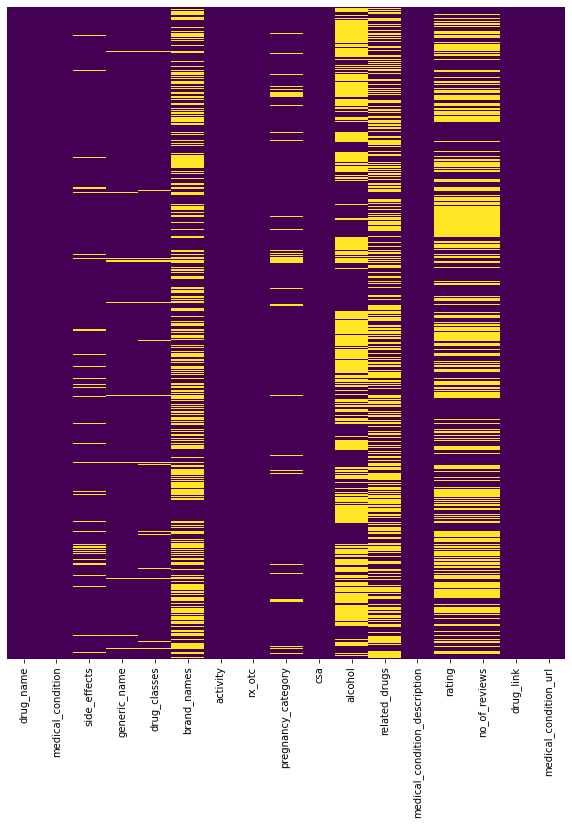

In [10]:
df.info()
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(df.any())
# list all duplicate rows

print("Duplicate Rows",df[dups])
#Cardinality 
df.nunique() # To determine the maximum and minimum number of variations in each column of the dataset
#Lets now check for null fields
import seaborn as sns
plt.figure(figsize=(10,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

In [11]:
# Data Cleaning¶
# Drop unwanted columns(not relevant for our model)
df = df.drop(['no_of_reviews', 'drug_link','medical_condition_url',"related_drugs"], axis = 1)
df.shape

(2931, 13)

In [12]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')
 

In [13]:
# 1) Duplicates
dupli = df.duplicated()
df[dupli].shape
# Changing NaN to unknown
df['side_effects'] = df['side_effects'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['side_effects'].isnull().sum()
df['generic_name'] = df['generic_name'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['generic_name'].isnull().sum()
df['drug_classes'] = df['drug_classes'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['drug_classes'].isnull().sum()
df['brand_names'] = df['brand_names'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['brand_names'].isnull().sum()
df['pregnancy_category'] = df['pregnancy_category'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['pregnancy_category'].isnull().sum()
df['alcohol'] = df['alcohol'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['alcohol'].isnull().sum()
df['medical_condition_description'] = df['medical_condition_description'].fillna(value='Unknown') #  Changing the NaN values to unknown
#df['medical_condition_description'].isnull().sum()

#df

C          1382
B           509
N           436
Unknown     229
D           228
X           129
A            18
Name: pregnancy_category, dtype: int64

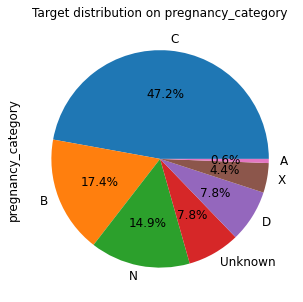

In [14]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))
# Pie plot
df['pregnancy_category'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on pregnancy_category")
df['pregnancy_category'].value_counts()

N    2688
2     101
4      71
3      26
5      20
M      16
U       9
Name: csa, dtype: int64

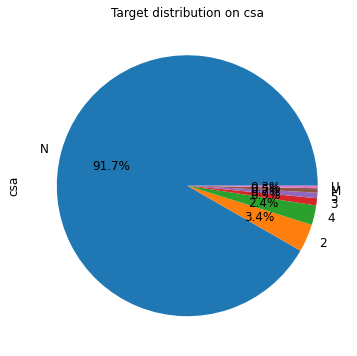

In [15]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(6,6))
# Pie plot
df['csa'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on csa")
df['csa'].value_counts()

<AxesSubplot:xlabel='csa', ylabel='count'>

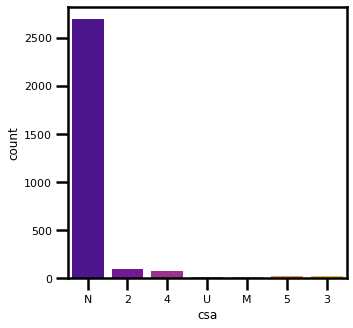

In [16]:
# Examining the variable's goal csa
plt.figure(figsize=(5,5))
sns.countplot(data=df,x = 'csa',palette='plasma')

Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Angina                   71
Bronchitis               71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Anxiety                  45
Cholesterol              45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
Weight Loss              23
COPD                     23
IBD (Bowel)              22
Cancer                   20
Schizophrenia       

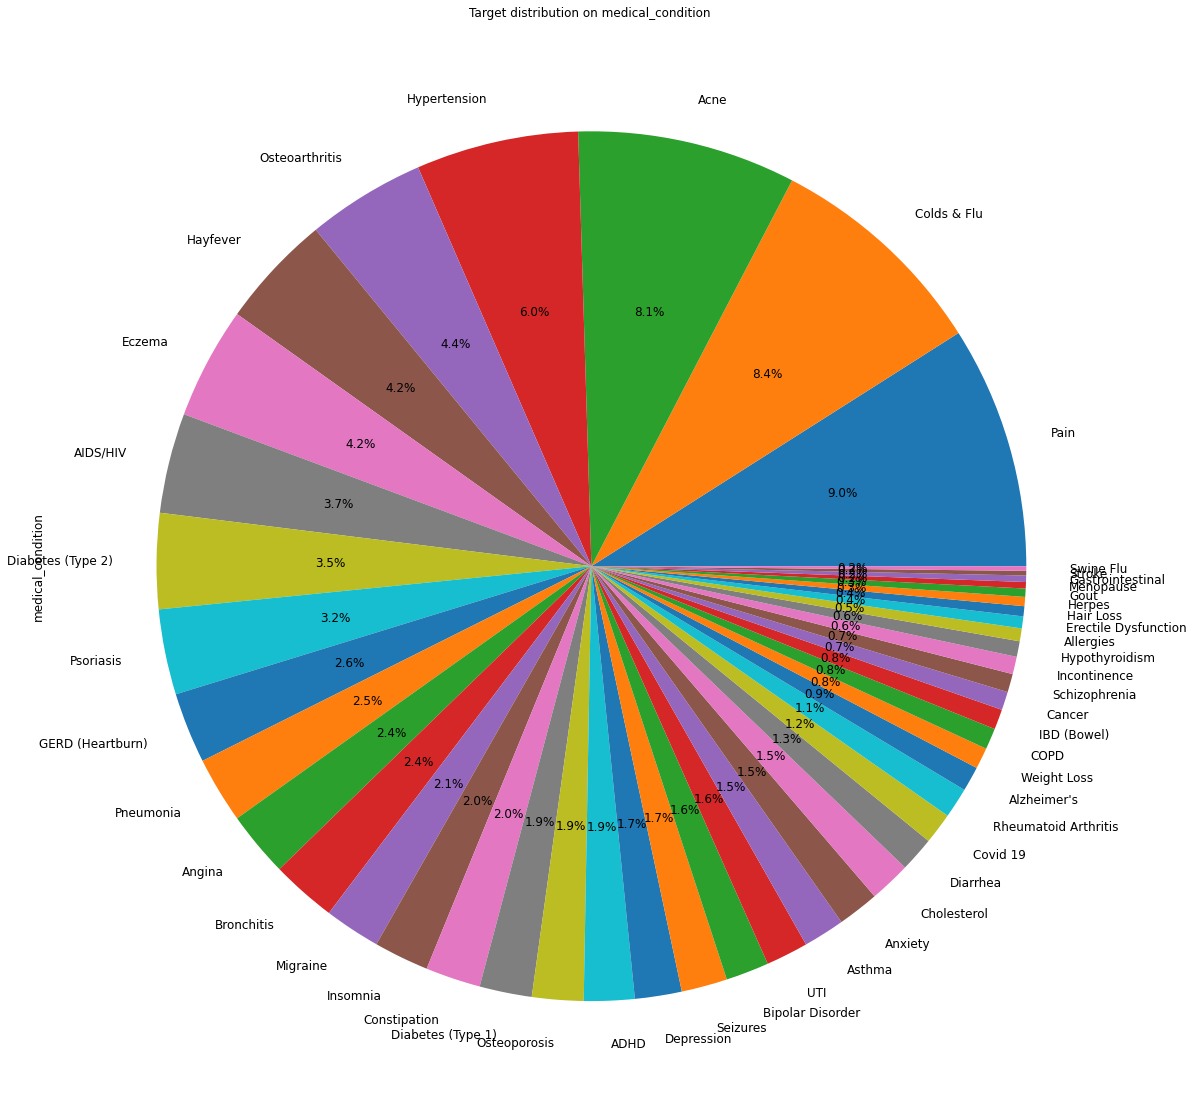

In [17]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(20,20))
# Pie plot
df['medical_condition'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on medical_condition ")
df['medical_condition'].value_counts()

Rx        1998
Rx/OTC     604
OTC        328
Name: rx_otc, dtype: int64

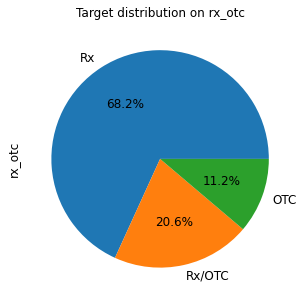

In [18]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))
# Pie plot
df['rx_otc'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on rx_otc")

df['rx_otc'].value_counts()

<AxesSubplot:xlabel='rx_otc', ylabel='count'>

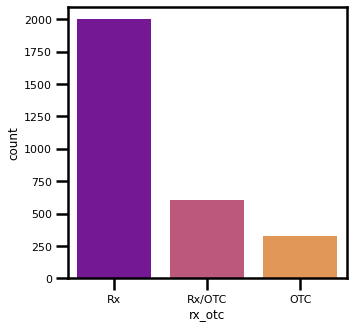

In [19]:
# Examining the variable's goal rx_otc
plt.figure(figsize=(5,5))
sns.countplot(data=df,x = 'rx_otc',palette='plasma')

Unknown    1554
X          1377
Name: alcohol, dtype: int64

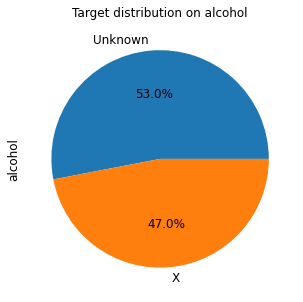

In [20]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))
# Pie plot
df['alcohol'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on alcohol")
df['alcohol'].value_counts()

10.0    153
9.0      92
8.0      62
7.0      44
1.0      44
       ... 
2.3       1
3.2       1
2.6       1
2.1       1
2.4       1
Name: rating, Length: 86, dtype: int64

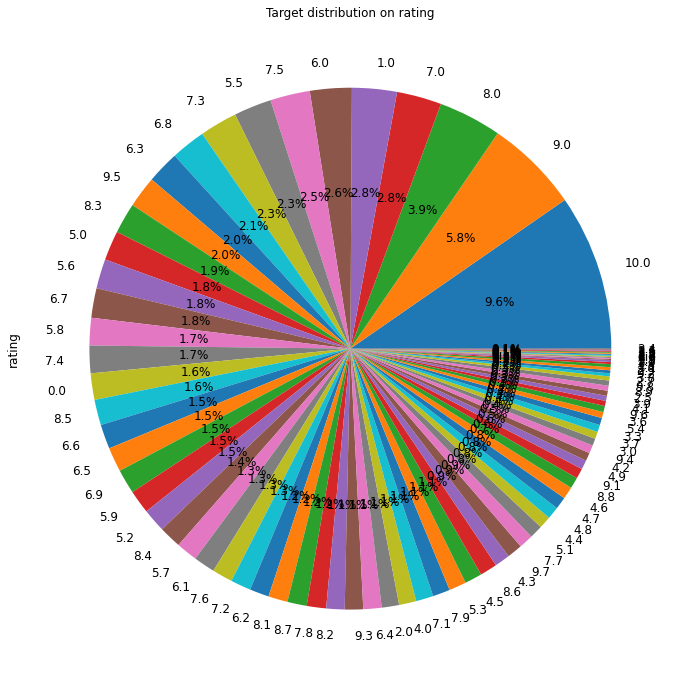

In [21]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(12,12))
# Pie plot
df['rating'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on rating")
df['rating'].value_counts()

<AxesSubplot:xlabel='rating', ylabel='count'>

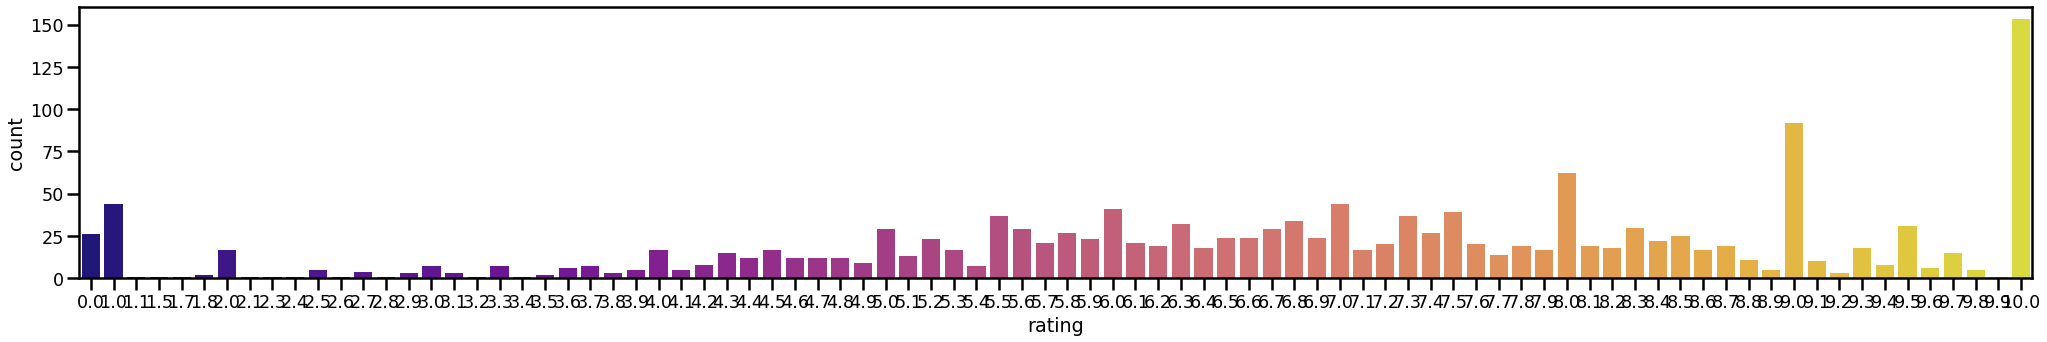

In [22]:
# Examining the variable's goal rating
sns.set_context('poster', font_scale=0.8)
plt.figure(figsize=(35,5))
sns.countplot(data=df,x = 'rating',palette='plasma')

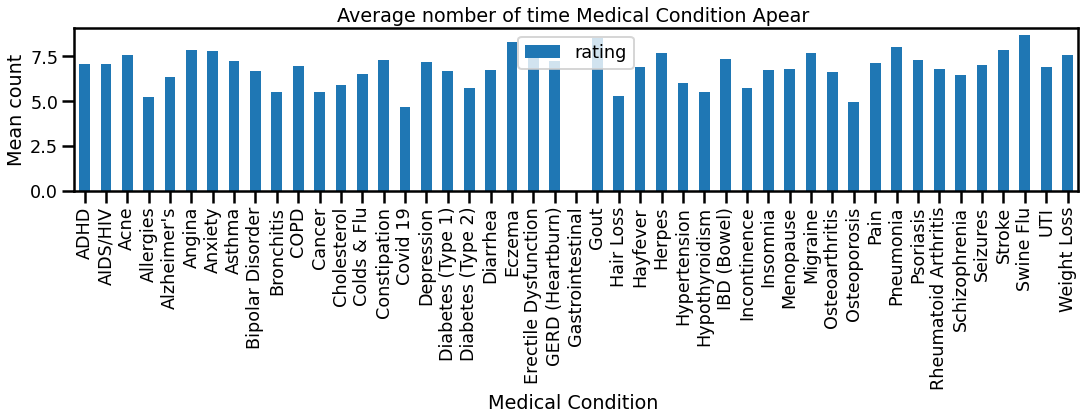

In [23]:
# data visualisation on medical_condition apears
sns.set_context('poster', font_scale=0.8)
df.groupby('medical_condition').mean().plot(kind='bar', figsize=(18,3)) 
plt.xlabel('Medical Condition ')
plt.ylabel('Mean count')
plt.title('Average nomber of time Medical Condition Apear ')
plt.show()

In [26]:
import plotly 
import plotly.express as ex

In [25]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [27]:
ex.box(x = 'rx_otc', y = 'medical_condition',data_frame = df, template='seaborn', 
       notched=True, width=800, height=500)

In [28]:
ex.box(x = 'alcohol', y = 'medical_condition',data_frame = df, template='seaborn', 
       notched=True, width=800, height=400)

In [29]:
ex.box(x = 'medical_condition', y = 'drug_classes',data_frame = df, template='seaborn', 
       notched=True, width=1200, height=600)

In [30]:
ex.box(x = 'drug_classes', y = 'activity',data_frame = df, template='seaborn', 
       notched=True, width=1200, height=1000)

In [31]:
ex.box(x = 'medical_condition', y = 'pregnancy_category',data_frame = df, template='seaborn', 
       notched=True, width=1200, height=600)